##Libraries and Utilities


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Fixings warnings
import warnings
warnings.filterwarnings('ignore')



#Visualisation
import seaborn as sns
import plotly.express as px
from termcolor import colored
import plotly.graph_objects as go
import plotly.figure_factory as ff


#Data spliting
from sklearn.model_selection import train_test_split

#1. Understanding the Data

In [3]:
data = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv")
print(data.shape)
data

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Check basic data summary for textual variables
data.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [6]:
# Check basic data summary for numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


# 2. Preprocessing

In [7]:
#counts the frequency of each unique value in a column.
for i in data.columns.values.tolist():
    print(data[i].value_counts())
    print("------------")

Person ID
374    1
1      1
2      1
3      1
4      1
      ..
11     1
10     1
9      1
8      1
7      1
Name: count, Length: 374, dtype: int64
------------
Gender
Male      189
Female    185
Name: count, dtype: int64
------------
Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
29    13
30    13
36    12
35    12
41    12
49    11
42     9
57     9
52     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
34     2
56     2
27     1
Name: count, dtype: int64
------------
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
------------
Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8

In [8]:
#replace Normal Weight with Normal in "BMI category column"
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

In [9]:
#find missing values
missing_values = data.isnull()
for i in data.columns.values.tolist():
    print(missing_values[i].value_counts())
    print("------------------")

Person ID
False    374
Name: count, dtype: int64
------------------
Gender
False    374
Name: count, dtype: int64
------------------
Age
False    374
Name: count, dtype: int64
------------------
Occupation
False    374
Name: count, dtype: int64
------------------
Sleep Duration
False    374
Name: count, dtype: int64
------------------
Quality of Sleep
False    374
Name: count, dtype: int64
------------------
Physical Activity Level
False    374
Name: count, dtype: int64
------------------
Stress Level
False    374
Name: count, dtype: int64
------------------
BMI Category
False    374
Name: count, dtype: int64
------------------
Blood Pressure
False    374
Name: count, dtype: int64
------------------
Heart Rate
False    374
Name: count, dtype: int64
------------------
Daily Steps
False    374
Name: count, dtype: int64
------------------
Sleep Disorder
True     219
False    155
Name: count, dtype: int64
------------------


In [10]:
#replace null values with Normal
data["Sleep Disorder"] = data["Sleep Disorder"].replace(np.nan, "Normal")

In [11]:
#create list from columns with string values
string_cols = data.select_dtypes(include='object').columns.tolist()
print("columns with string values:", string_cols)

columns with string values: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [12]:
#create copy of data because we will change data and we don't want to he original data to be corrupted.
data_copy = data.copy()

In [13]:
#Convert string columns to numeric
for col in string_cols:
    data_copy[col] = data_copy[col].astype('category').cat.codes

In [14]:
data_copy.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,11,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,4,1,28,6,5.9,4,30,8,1,22,85,3000,2
4,5,1,28,6,5.9,4,30,8,1,22,85,3000,2
5,6,1,28,9,5.9,4,30,8,1,22,85,3000,0
6,7,1,29,10,6.3,6,40,7,1,22,82,3500,0
7,8,1,29,1,7.8,7,75,6,0,6,70,8000,1
8,9,1,29,1,7.8,7,75,6,0,6,70,8000,1
9,10,1,29,1,7.8,7,75,6,0,6,70,8000,1


#3. analysis data

##1. The effect of each feature in DecisionTreeClassifier

In [15]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
#drop "Person ID column" because it doesn't have much impact.
data_copy=data_copy.drop('Person ID',axis=1)

In [17]:
#split data into train and test sets
X = data_copy.drop('Sleep Disorder', axis=1)
y = data_copy['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
#create
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

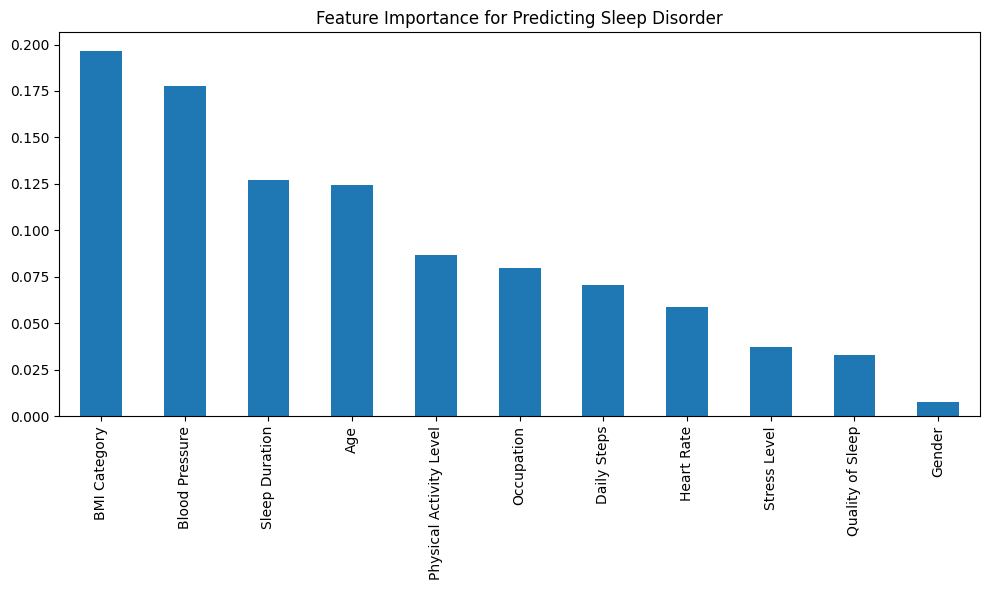

In [19]:
#important feature in decision tree
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances.plot(kind='bar', figsize=(10,6), title='Feature Importance for Predicting Sleep Disorder')
plt.tight_layout()
plt.show()

In [20]:
!pip install tabulate


In [21]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_importances.index,
    'Importance': feature_importances.values
})


print("Classification Report:")
display(report_df)


print("Feature Importances:")
display(importance_df)


Classification Report:


,precision,recall,f1-score,support
0,0.769231,0.833333,0.800000,24.000000
1,0.938462,0.983871,0.960630,62.000000
2,0.909091,0.740741,0.816327,27.000000
accuracy,0.893805,0.893805,0.893805,0.893805
macro avg,0.872261,0.852648,0.858985,113.000000
weighted avg,0.895501,0.893805,0.892034,113.000000


Feature Importances:


,Feature,Importance
0,BMI Category,0.196725
1,Blood Pressure,0.177432
2,Sleep Duration,0.126898
3,Age,0.124525
4,Physical Activity Level,0.086813
5,Occupation,0.079955
6,Daily Steps,0.070865
7,Heart Rate,0.059002
8,Stress Level,0.037138
9,Quality of Sleep,0.033110


##2. associations between specific feature values and sleep disorder categories.

Gender,Female,Male
Sleep Disorder,,
Insomnia,46.753247,53.246753
Normal,37.442922,62.557078
Sleep Apnea,85.897436,14.102564


Occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
Sleep Disorder,,,,,,,,,,,
Insomnia,9.090909,3.896104,6.493506,2.597403,0.000000,3.896104,0.000000,37.662338,0.000000,1.298701,35.064935
Normal,13.698630,29.223744,26.027397,19.178082,0.456621,4.109589,0.000000,0.913242,0.913242,1.369863,4.109589
Sleep Apnea,0.000000,5.128205,1.282051,3.846154,0.000000,78.205128,2.564103,1.282051,2.564103,0.000000,5.128205


BMI Category,Normal,Obese,Overweight
Sleep Disorder,,,
Insomnia,11.688312,5.194805,83.116883
Normal,91.324201,0.000000,8.675799
Sleep Apnea,8.974359,7.692308,83.333333


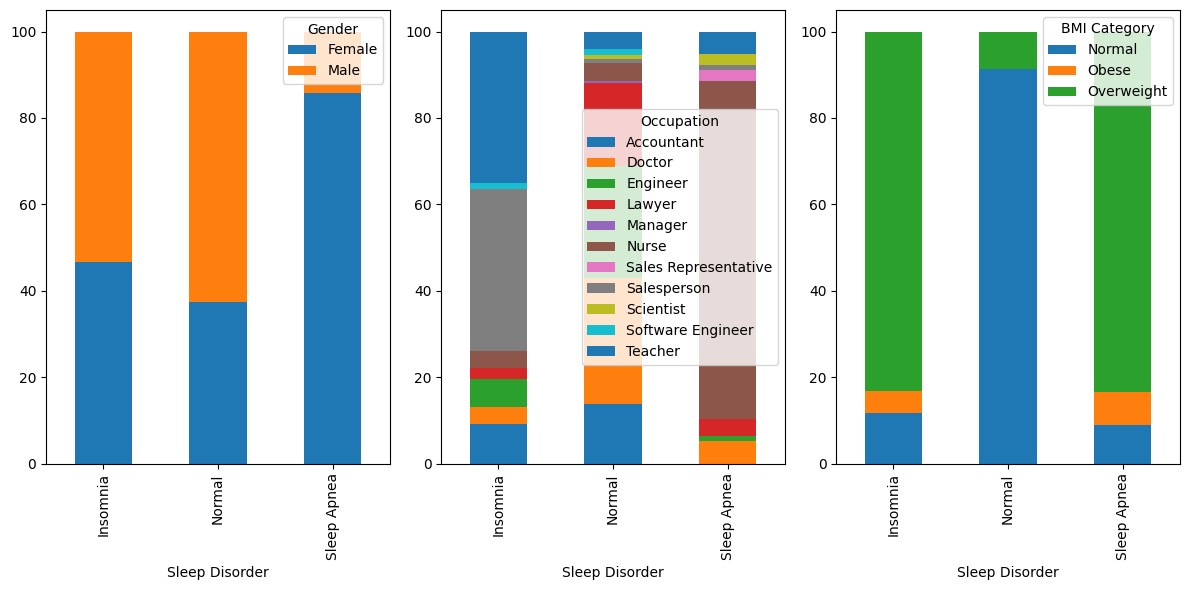

In [22]:
Gender_Sleep = data.pivot_table(
    index="Sleep Disorder",
    columns="Gender",
    values="Person ID",
    aggfunc="count"
)
Gender_Sleep_percent = Gender_Sleep.div(Gender_Sleep.sum(axis=1), axis=0) * 100

Occupation_Sleep = data.pivot_table(
    index="Sleep Disorder",
    columns="Occupation",
    values="Person ID",
    aggfunc="count",
    fill_value = 0
)
Occupation_Sleep_percent = Occupation_Sleep.div(Occupation_Sleep.sum(axis=1), axis=0) * 100

BMI_Sleep = data.pivot_table(
    index="Sleep Disorder",
    columns="BMI Category",
    values="Person ID",
    aggfunc="count",
    fill_value = 0
)
BMI_Sleep_percent = BMI_Sleep.div(BMI_Sleep.sum(axis=1), axis=0) * 100

display(Gender_Sleep_percent)
display(Occupation_Sleep_percent)
display(BMI_Sleep_percent)

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
Gender_Sleep_percent.plot(kind = "bar", stacked = True, ax=axes[0])
Occupation_Sleep_percent.plot(kind = "bar", stacked = True, ax=axes[1])
BMI_Sleep_percent.plot(kind = "bar", stacked = True, ax=axes[2])

plt.tight_layout()
plt.show()

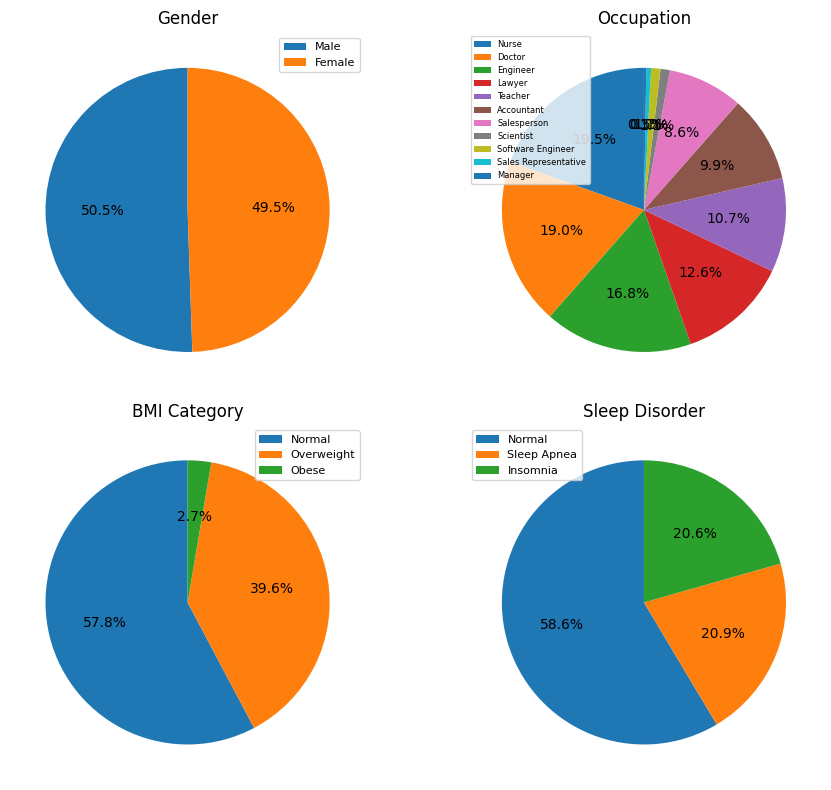

In [23]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))

axes[0, 0].pie((data["Gender"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 0].set_title("Gender")
axes[0, 0].legend(labels = (data["Gender"]).value_counts().index,
                  loc="upper right",
                  fontsize=8)

axes[0, 1].pie((data["Occupation"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[0, 1].set_title("Occupation")
axes[0, 1].legend(labels = (data["Occupation"]).value_counts().index,
                  loc="upper left",
                  fontsize=6)

axes[1, 0].pie((data["BMI Category"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[1, 0].set_title("BMI Category")
axes[1, 0].legend(labels = (data["BMI Category"]).value_counts().index,
                  loc="upper right",
                  fontsize=8)

axes[1, 1].pie((data["Sleep Disorder"]).value_counts(),
               autopct='%1.1f%%',
               startangle=90)
axes[1, 1].set_title("Sleep Disorder")
axes[1, 1].legend(labels = (data["Sleep Disorder"]).value_counts().index,
                  loc="upper left",
                  fontsize=8)


plt.tight_layout()
plt.show()

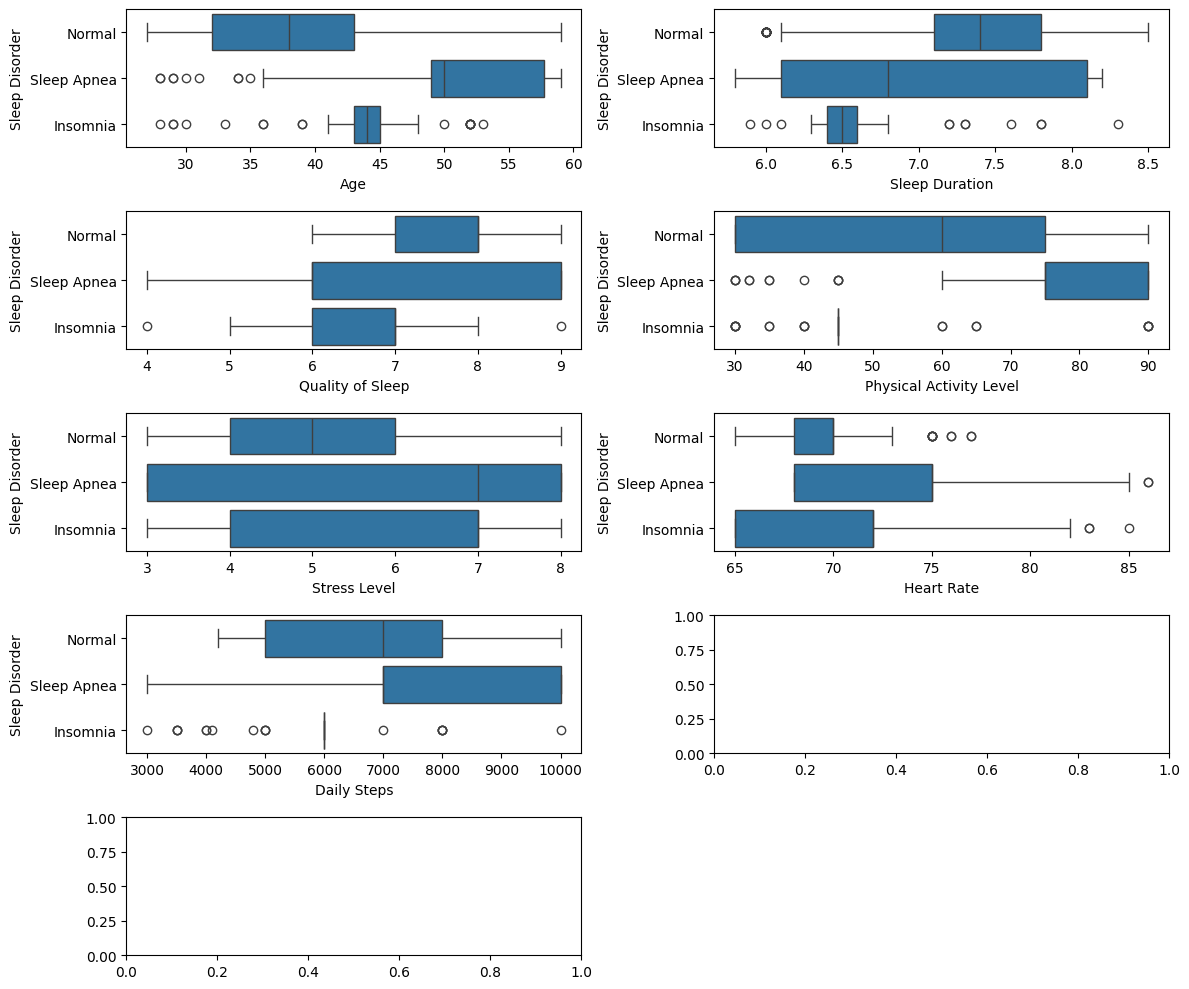

In [24]:
numrical_columns = data.select_dtypes(include='number').columns.tolist()
numrical_columns.remove("Person ID")

fig, axes = plt.subplots(5, 2, figsize = (12, 10))

x = 0; y=0
for i in numrical_columns:
    sns.boxplot(x = i, y = "Sleep Disorder", data = data, ax=axes[x, y])
    if y != 1:
        y = y + 1
    elif y == 1:
        x = x + 1
        y = 0
fig.delaxes(axes[4, 1])
plt.tight_layout()
plt.show()

numerical features:

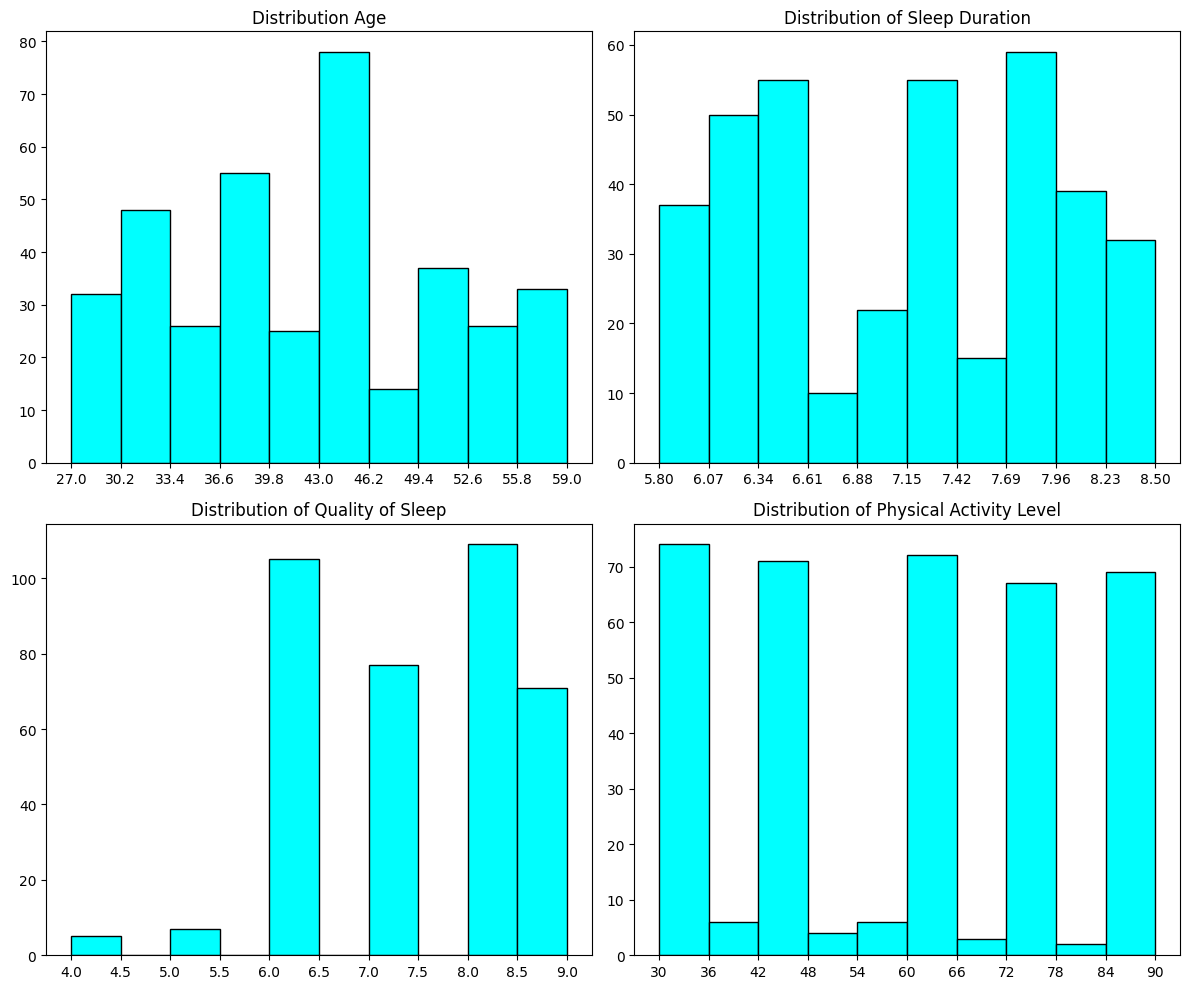

In [25]:
count, pin_edges = np.histogram(data["Age"])
count2, pin_edges2 = np.histogram(data["Sleep Duration"])
count3, pin_edges3 = np.histogram(data["Quality of Sleep"])
count4, pin_edges4 = np.histogram(data["Physical Activity Level"])

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(data["Age"], color ="aqua", edgecolor="black")
axes[0, 0].set_title("Distribution Age")
axes[0, 0].set_xticks(pin_edges)

axes[0, 1].hist(data["Sleep Duration"], color ="aqua", edgecolor="black")
axes[0, 1].set_title("Distribution of Sleep Duration")
axes[0, 1].set_xticks(pin_edges2)

axes[1, 0].hist(data["Quality of Sleep"], color ="aqua", edgecolor="black")
axes[1, 0].set_title("Distribution of Quality of Sleep")
axes[1, 0].set_xticks(pin_edges3)

axes[1, 1].hist(data["Physical Activity Level"], color ="aqua", edgecolor="black")
axes[1, 1].set_title("Distribution of Physical Activity Level")
axes[1, 1].set_xticks(pin_edges4)

plt.tight_layout()
plt.show()

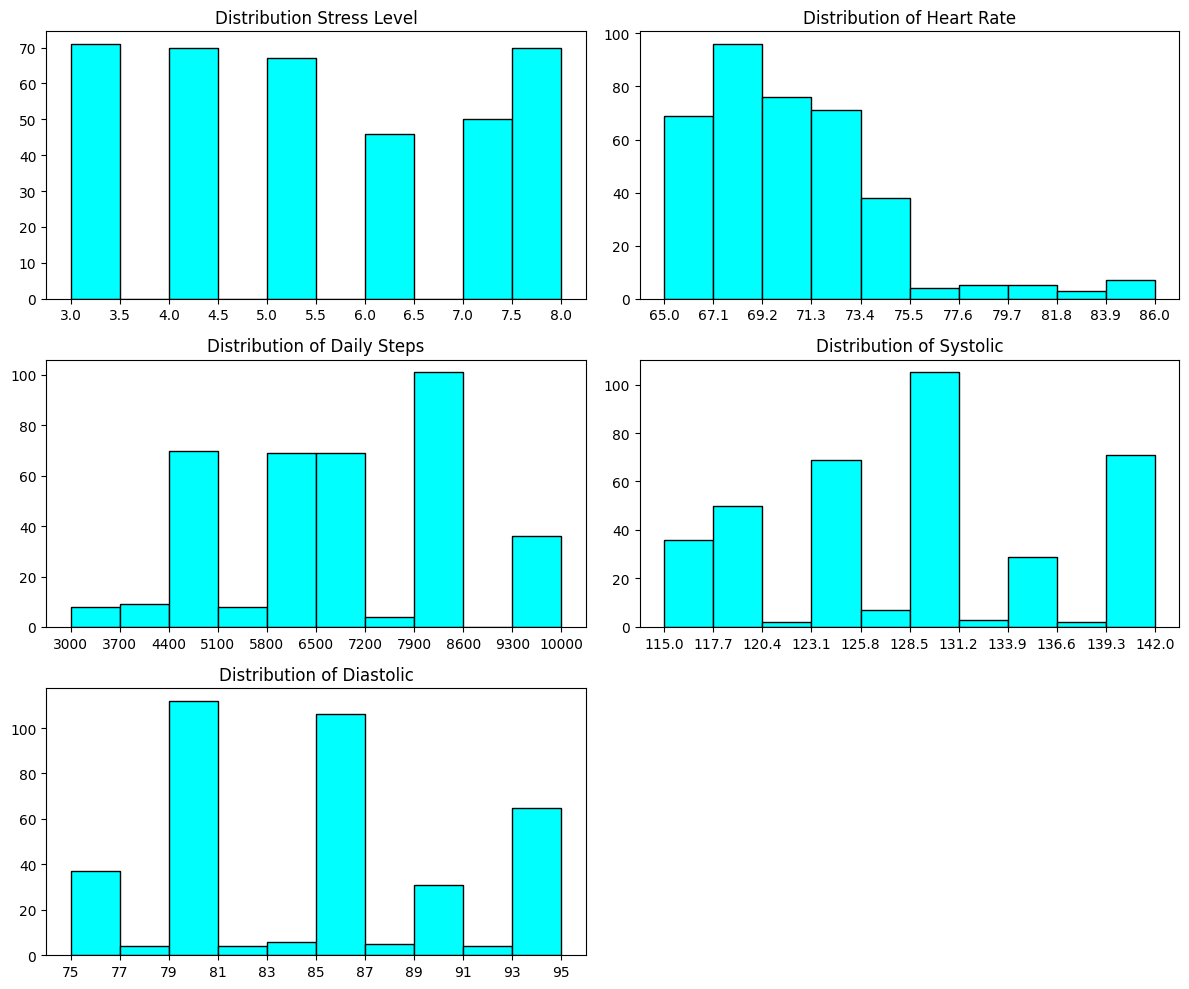

In [26]:
data_cpy = data.copy()
data_cpy[['Systolic', 'Diastolic']] = data_cpy["Blood Pressure"].str.split('/', expand = True).astype(int)
data_cpy.drop("Blood Pressure", axis= 1 ,inplace = True)

count, pin_edges = np.histogram(data_cpy["Stress Level"])
count2, pin_edges2 = np.histogram(data_cpy["Heart Rate"])
count3, pin_edges3 = np.histogram(data_cpy["Daily Steps"])
count4, pin_edges4 = np.histogram(data_cpy["Systolic"])
count5, pin_edges5 = np.histogram(data_cpy["Diastolic"])

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

axes[0, 0].hist(data_cpy["Stress Level"], color ="aqua", edgecolor="black")
axes[0, 0].set_title("Distribution Stress Level")
axes[0, 0].set_xticks(pin_edges)

axes[0, 1].hist(data_cpy["Heart Rate"], color ="aqua", edgecolor="black")
axes[0, 1].set_title("Distribution of Heart Rate")
axes[0, 1].set_xticks(pin_edges2)

axes[1, 0].hist(data_cpy["Daily Steps"], color ="aqua", edgecolor="black")
axes[1, 0].set_title("Distribution of Daily Steps")
axes[1, 0].set_xticks(pin_edges3)

axes[1, 1].hist(data_cpy["Systolic"], color ="aqua", edgecolor="black")
axes[1, 1].set_title("Distribution of Systolic")
axes[1, 1].set_xticks(pin_edges4)

axes[2, 0].hist(data_cpy["Diastolic"], color ="aqua", edgecolor="black")
axes[2, 0].set_title("Distribution of Diastolic")
axes[2, 0].set_xticks(pin_edges5)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [27]:
columns = ["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level",
       "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
results = []
for i in columns:
    col = data_cpy.groupby(["Sleep Disorder"]).agg(
    **{i : (i, "mean")} )
    results.append(col)

final_result = pd.concat(results, axis=1)

display(final_result)

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
Sleep Disorder,,,,,,,,
Insomnia,6.589610,6.532468,46.818182,5.870130,70.467532,5901.298701,132.038961,86.857143
Normal,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037,124.045662,81.000000
Sleep Apnea,7.032051,7.205128,74.794872,5.666667,73.089744,7619.230769,137.769231,92.717949


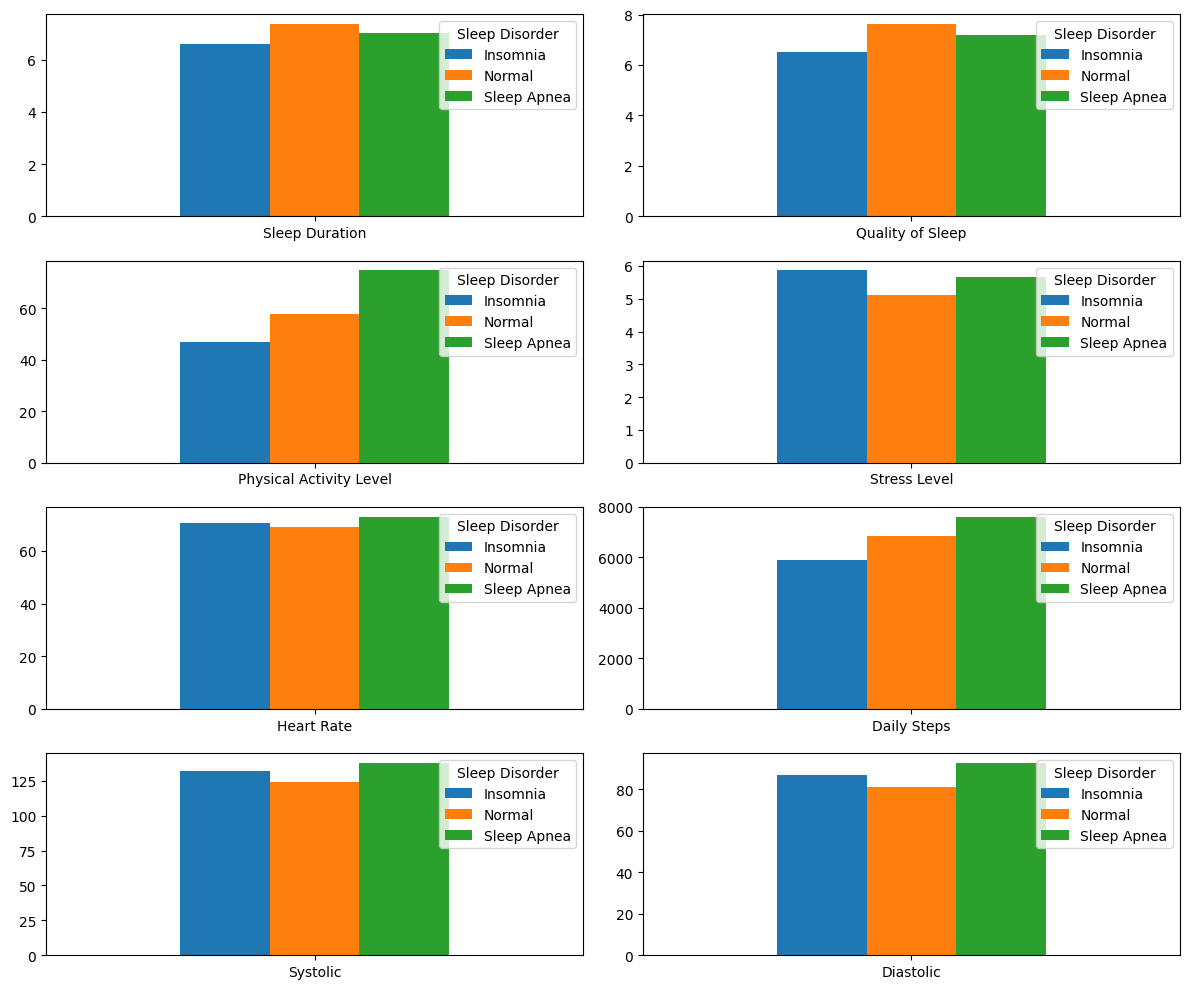

In [28]:
fig, axes = plt.subplots(4, 2, figsize = (12, 10))

x = 0; y=0
for i in results:
    i.transpose().plot(kind = "bar", ax = axes[x, y])
    axes[x, y].tick_params(axis='x', rotation=0)
    if y != 1:
        y = y + 1
    elif y == 1:
        x = x + 1
        y = 0

plt.tight_layout()
plt.show()

In [29]:
fig=px.sunburst(data_cpy,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

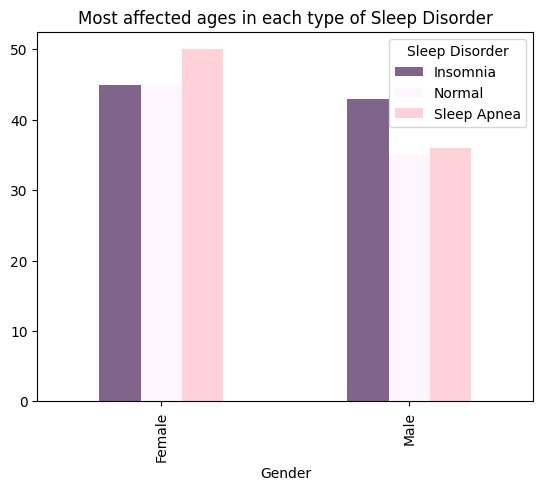

In [30]:
data_cpy.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',color={'#FFF3FD','#4A235A','pink'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)


plt.show()

In [31]:
fig=px.scatter_3d(data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

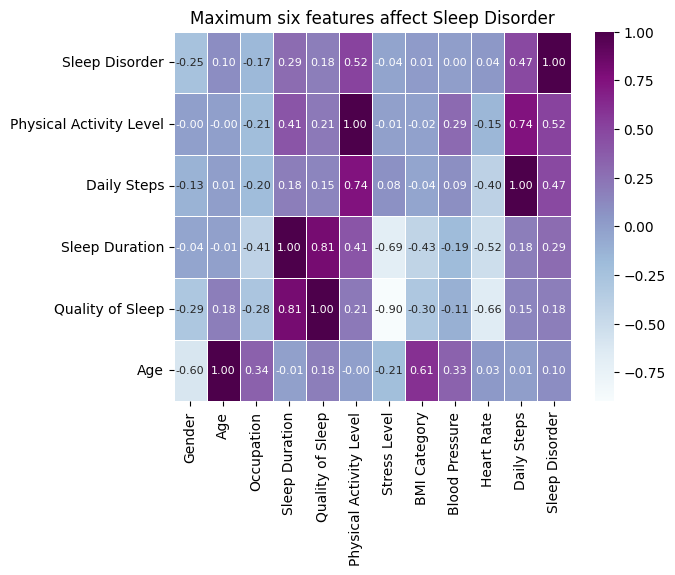

In [32]:
sleep_data = data.copy()

sleep_data['Blood Pressure']=sleep_data['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

sleep_data["Age"]=pd.cut(sleep_data["Age"],2)
sleep_data["Heart Rate"]=pd.cut(sleep_data["Heart Rate"],4)
sleep_data["Daily Steps"]=pd.cut(sleep_data["Daily Steps"],4)
sleep_data["Sleep Duration"]=pd.cut(sleep_data["Sleep Duration"],3)
sleep_data["Physical Activity Level"]=pd.cut(sleep_data["Physical Activity Level"],4)


from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep_data[label]=LE.fit_transform(sleep_data[label])





sleep_data.drop(['Person ID'], axis=1, inplace=True)


correlation=sleep_data.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

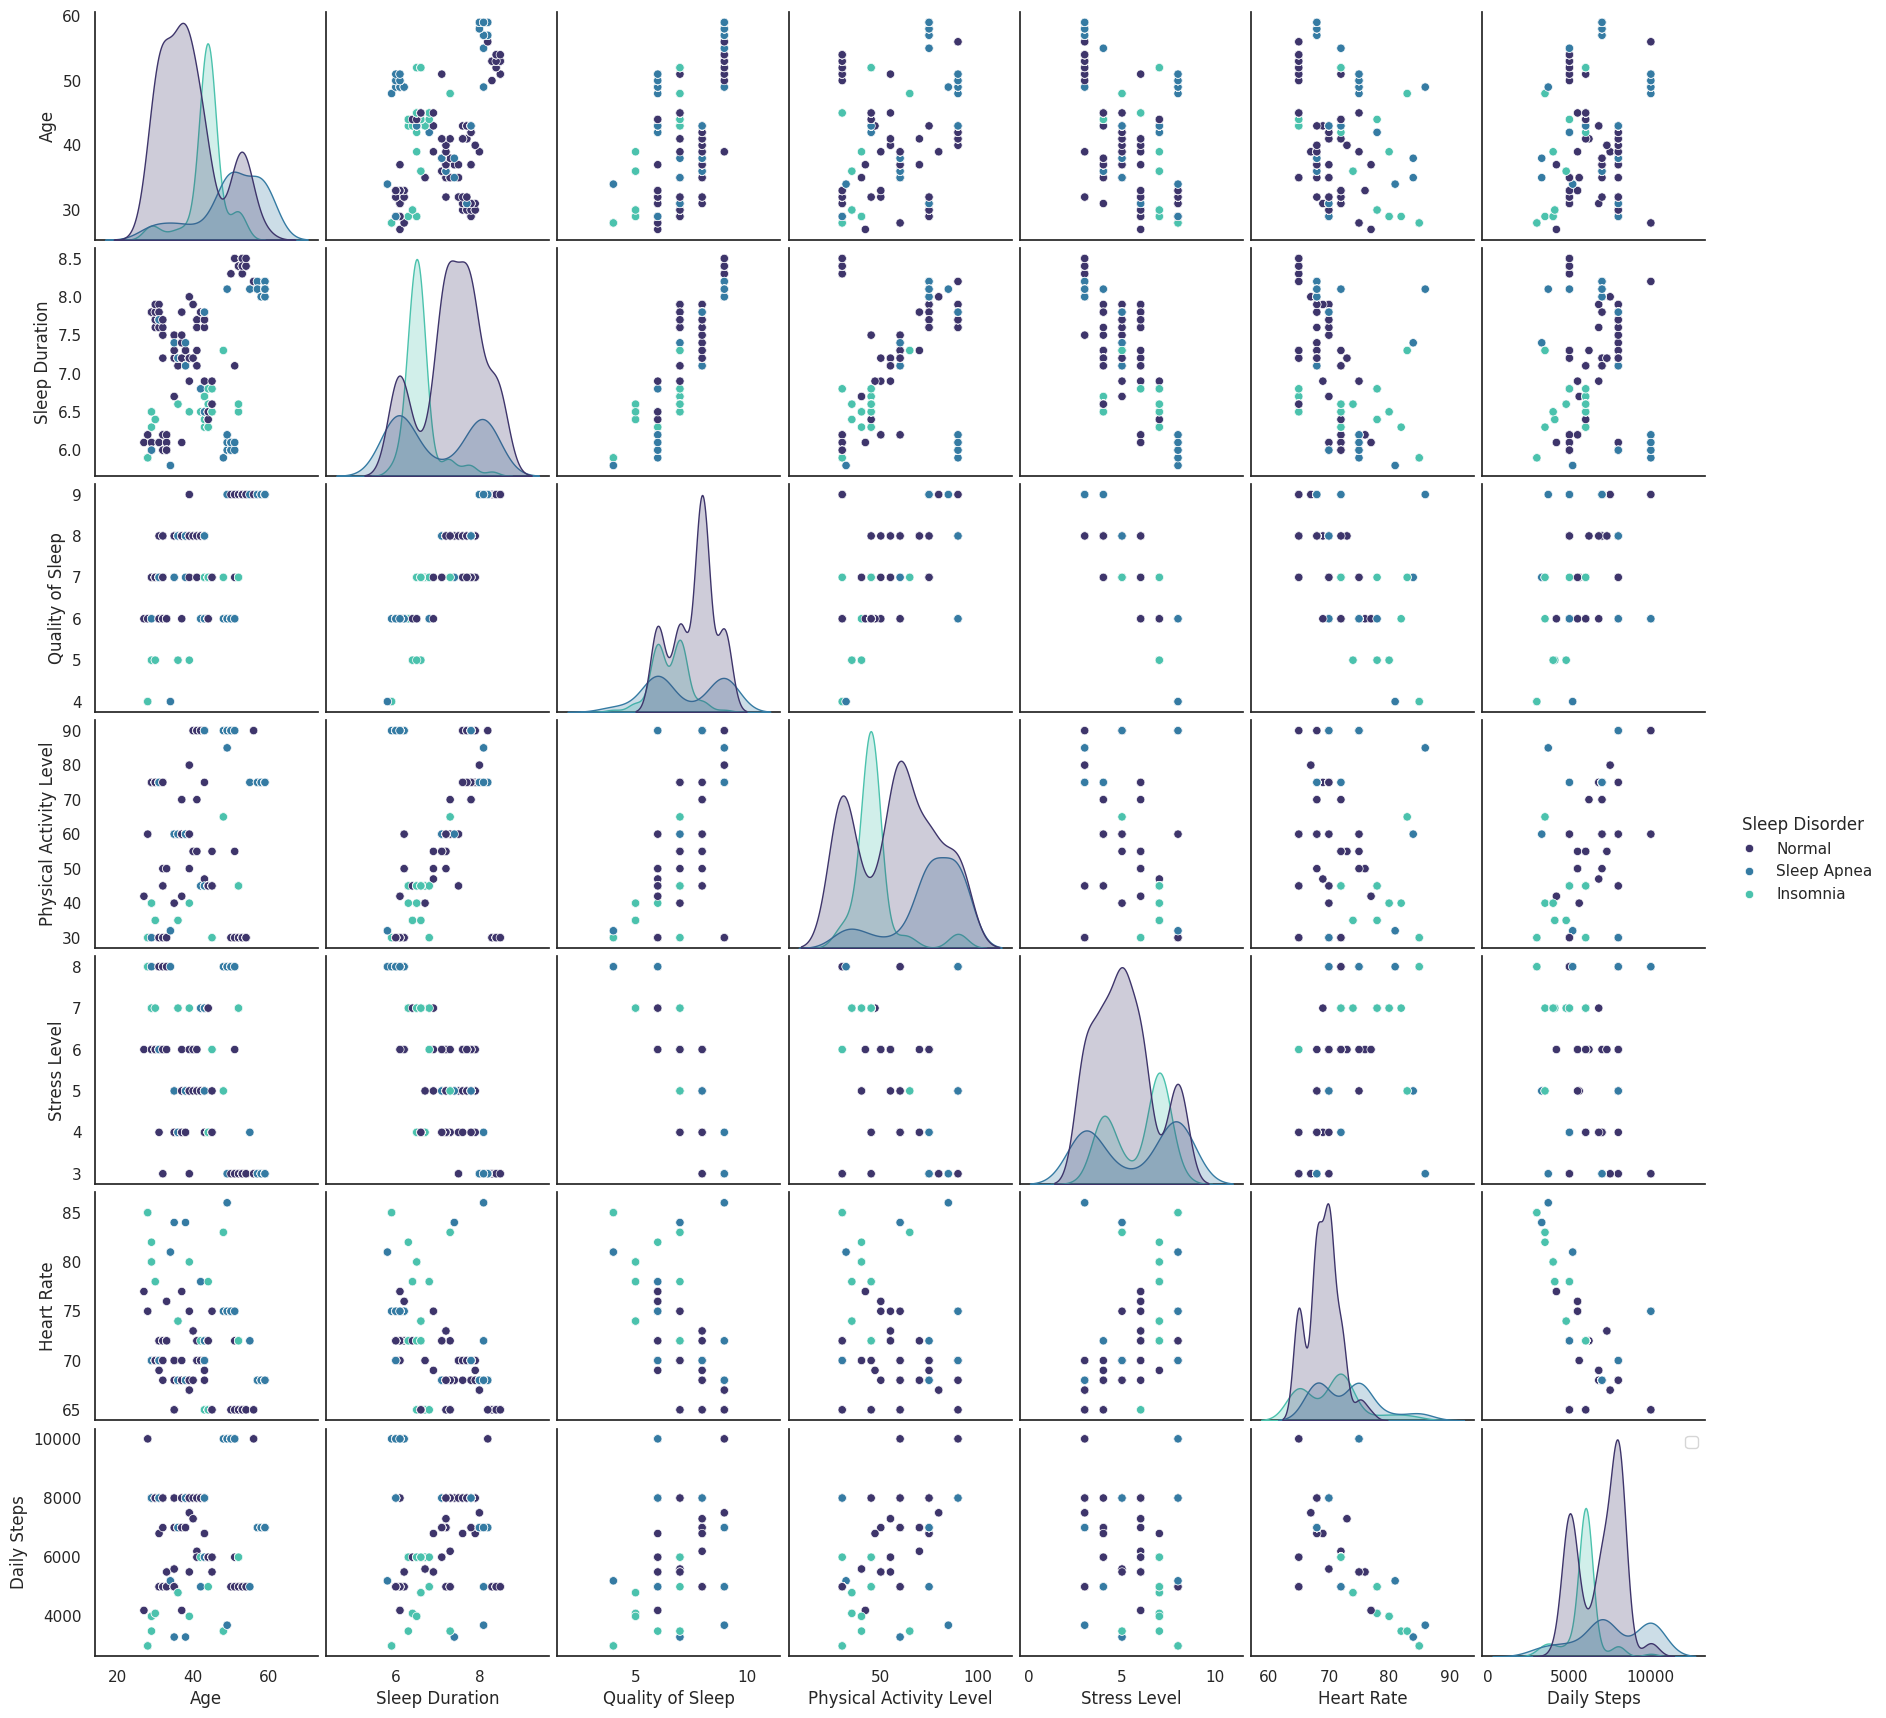

In [33]:
sns.set_theme(style='white')
sns.pairplot(data=data.drop('Person ID', axis=1), hue='Sleep Disorder', palette='mako')
plt.legend()
plt.show()

In [34]:
fig=px.histogram(data,x='Sleep Disorder',
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)


fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

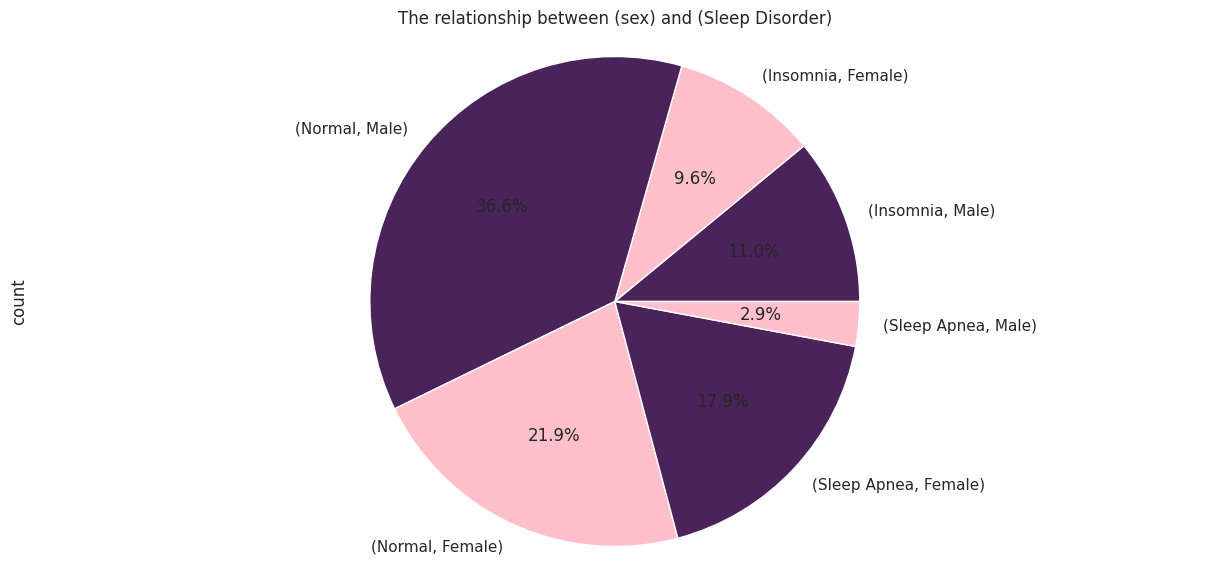

In [35]:
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=['#4A235A','pink','#4A235A','pink','#4A235A','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

Clustering

idae

In [39]:
occupation_sleep_counts = pd.crosstab(data['Occupation'], data['Sleep Disorder'])
display(occupation_sleep_counts)


Sleep Disorder,Insomnia,Normal,Sleep Apnea
Occupation,,,
Accountant,7,30,0
Doctor,3,64,4
Engineer,5,57,1
Lawyer,2,42,3
Manager,0,1,0
Nurse,3,9,61
Sales Representative,0,0,2
Salesperson,29,2,1
Scientist,0,2,2


In [40]:
results = []
for occupation in data['Occupation'].unique():
    group = data[data['Occupation'] == occupation]
    summary = group.groupby('Sleep Disorder')[["Age", "Sleep Duration", "Quality of Sleep",
                                               "Physical Activity Level", "Stress Level",
                                               "Heart Rate", "Daily Steps"]].mean()
    summary['Occupation'] = occupation
    results.append(summary)

final_summary = pd.concat(results)
display(final_summary)


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation
Sleep Disorder,,,,,,,,
Insomnia,28.000000,5.900000,4.000000,30.000000,8.000000,85.000000,3000.000000,Software Engineer
Normal,32.333333,7.033333,7.333333,54.000000,5.333333,72.333333,6733.333333,Software Engineer
Insomnia,43.000000,6.866667,6.666667,53.333333,6.000000,79.333333,4000.000000,Doctor
Normal,31.765625,6.943750,6.578125,54.609375,6.875000,70.750000,7000.000000,Doctor
Sleep Apnea,39.500000,7.475000,7.750000,68.750000,5.000000,78.000000,5850.000000,Doctor
Sleep Apnea,28.000000,5.900000,4.000000,30.000000,8.000000,85.000000,3000.000000,Sales Representative
Insomnia,43.444444,6.585185,6.888889,43.333333,4.370370,65.962963,5862.962963,Teacher
Normal,37.777778,6.933333,7.555556,52.222222,4.222222,67.777778,6466.666667,Teacher
Sleep Apnea,39.000000,6.850000,6.250000,46.250000,6.250000,74.500000,5450.000000,Teacher


In [41]:
from sklearn.ensemble import RandomForestClassifier

feature_importance_list = []

# ساخت mapping از کد به اسم از دیتافریم اصلی
categories = data['Occupation'].astype('category').cat.categories
occupation_mapping = dict(enumerate(categories))



for occupation in data_copy['Occupation'].unique():
    group = data_copy[data_copy['Occupation'] == occupation]
    if len(group['Sleep Disorder'].unique()) < 2:
        continue  # پرش شغل‌هایی با داده کم یا بدون تنوع اختلال

    X = group[["Age", "Gender", "Sleep Duration", "Quality of Sleep", "Physical Activity Level",
               "Stress Level", "BMI Category", "Blood Pressure", "Heart Rate", "Daily Steps"]]
    y = group['Sleep Disorder']

    # حذف داده‌های ناقص
    X = X.dropna()
    y = y[X.index]

    if len(y) < 5:
        continue  # پرش گروه‌هایی با داده ناکافی

    model = RandomForestClassifier(random_state=0)
    model.fit(X, y)

    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)

    feature_importance_list.append((occupation, importances))

for occupation, importances in feature_importance_list:
    occupation_name = occupation_mapping.get(occupation, occupation)
    print(f"\nOccupation: {occupation_name}")
    print(importances)



Occupation: Doctor
Daily Steps                0.189491
BMI Category               0.172544
Heart Rate                 0.162135
Blood Pressure             0.115906
Sleep Duration             0.110187
Age                        0.091815
Stress Level               0.080296
Quality of Sleep           0.041374
Physical Activity Level    0.033988
Gender                     0.002262
dtype: float64

Occupation: Teacher
Blood Pressure             0.279282
Age                        0.166644
Sleep Duration             0.146961
Heart Rate                 0.145505
Daily Steps                0.077535
Quality of Sleep           0.062790
Stress Level               0.041894
Physical Activity Level    0.034441
BMI Category               0.030501
Gender                     0.014447
dtype: float64

Occupation: Nurse
Blood Pressure             0.278131
Age                        0.168064
Sleep Duration             0.164230
BMI Category               0.104486
Physical Activity Level    0.091195
Daily Step

Gender

In [42]:
from sklearn.ensemble import RandomForestClassifier

gender_feature_importance_list = []

# ساخت mapping از کد به اسم از دیتافریم اصلی
categories = data['Gender'].astype('category').cat.categories
Gender_mapping = dict(enumerate(categories))


for gender in data_copy['Gender'].unique():
    group = data_copy[data_copy['Gender'] == gender]
    if len(group['Sleep Disorder'].unique()) < 2:
        continue  # پرش جنسیت‌هایی با داده کم یا بدون تنوع اختلال

    X = group[["Age", "Occupation", "Sleep Duration", "Quality of Sleep", "Physical Activity Level",
               "Stress Level", "BMI Category", "Blood Pressure", "Heart Rate", "Daily Steps"]]
    y = group['Sleep Disorder']

    # حذف داده‌های ناقص
    X = X.dropna()
    y = y[X.index]

    if len(y) < 5:
        continue  # پرش گروه‌هایی با داده ناکافی

    model = RandomForestClassifier(random_state=0)
    model.fit(X, y)

    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances = importances.sort_values(ascending=False)

    gender_feature_importance_list.append((gender, importances))

# نمایش نتایج
for gender, importances in gender_feature_importance_list:
    Gender_name = Gender_mapping.get(gender, gender)
    print(f"\nGender: {Gender_name}")
    print(importances)



Gender: Male
BMI Category               0.231993
Occupation                 0.177843
Age                        0.123999
Blood Pressure             0.103110
Heart Rate                 0.101036
Sleep Duration             0.095743
Daily Steps                0.066238
Stress Level               0.047208
Physical Activity Level    0.029715
Quality of Sleep           0.023116
dtype: float64

Gender: Female
Blood Pressure             0.262986
BMI Category               0.146200
Occupation                 0.131814
Physical Activity Level    0.126408
Heart Rate                 0.091182
Sleep Duration             0.069004
Age                        0.064244
Daily Steps                0.047226
Quality of Sleep           0.041810
Stress Level               0.019126
dtype: float64


model

In [44]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import time

RANDOM_STATE = 42
N_ESTIMATORS = 100



models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE, multi_class='auto'),
    "SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()

}

results = []


for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    start_time = time.time()

    model.fit(X_train, y_train)

    train_time = time.time() - start_time
    print(f"Training Time: {train_time:.3f} seconds")

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    ac = accuracy_score(y_test, y_pred)
    ps = precision_score(y_test, y_pred, average='macro')
    rs = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cfmx = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {ac:.4f}")
    print(f"Precision: {ps:.4f}")
    print(f"Recall: {rs:.4f}")
    print(f"F1-Score: {f1:.4f}")

    results.append({
        "Model": model_name,
        "Accuracy": ac,
        "Precision": ps,
        "Recall": rs,
        "F1-Score": f1,
        "Train Time": train_time,
        "Confusion Matrix": cfmx
     })


--- Logistic Regression ---
Training Time: 0.228 seconds
Accuracy: 0.9115
Precision: 0.9133
Recall: 0.8789
F1-Score: 0.8926

--- SVM ---
Training Time: 0.033 seconds
Accuracy: 0.8938
Precision: 0.8723
Recall: 0.8526
F1-Score: 0.8590

--- Naive Bayes ---
Training Time: 0.003 seconds
Accuracy: 0.8938
Precision: 0.8804
Recall: 0.8681
F1-Score: 0.8696

--- DecisionTreeClassifier ---
Training Time: 0.025 seconds
Accuracy: 0.8673
Precision: 0.8511
Recall: 0.8295
F1-Score: 0.8350

--- RandomForestClassifier ---
Training Time: 0.606 seconds
Accuracy: 0.8938
Precision: 0.8723
Recall: 0.8526
F1-Score: 0.8590
